# Visualize Financial Market Data
---

Here, we’ll demonstrate the visualization of financial market data using the `capon` theme.

In [1]:
# # Install libraries - uncomment if running on a new environment (e.g., Colab)
# !pip install --upgrade themes

In [2]:
import themes


themes.register()

## The Data

We'll use an out-of-the-box sample data.

In [3]:
from themes import datasets

help(datasets.load_markets)

Help on function load_markets in module themes.datasets:

load_markets()
    https://github.com/gialdetti/capon/



In [4]:
markets = (
    datasets.load_markets()
    .pipe(lambda df: df[df["timestamp"] > "2020"])
    .assign(
        relative_price=lambda df: df.groupby("symbol")["close"].transform(
            lambda g: g / g.iloc[0] - 1
        )
    )
)
markets

,timestamp,symbol,currency,volume,open,high,low,close,adjclose,relative_price
1907,2020-01-02 10:30:00-04:00,^GSPC,USD,3458250000,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,0.000000
1908,2020-01-03 10:30:00-04:00,^GSPC,USD,3461290000,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,-0.007060
1909,2020-01-06 10:30:00-04:00,^GSPC,USD,3674070000,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,-0.003551
1910,2020-01-07 10:30:00-04:00,^GSPC,USD,3420380000,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,-0.006345
1911,2020-01-08 10:30:00-04:00,^GSPC,USD,3720890000,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,-0.001473
...,...,...,...,...,...,...,...,...,...,...
10059,2022-05-25 09:30:00-04:00,^RUT,USD,4322190000,1760.420044,1807.430054,1759.199951,1799.160034,1799.160034,0.079429
10060,2022-05-26 09:30:00-04:00,^RUT,USD,3961940000,1808.640015,1847.829956,1808.640015,1838.239990,1838.239990,0.102876
10061,2022-05-27 09:30:00-04:00,^RUT,USD,3560560000,1845.239990,1887.900024,1845.239990,1887.900024,1887.900024,0.132670
10062,2022-05-31 09:30:00-04:00,^RUT,USD,5192220000,1882.000000,1883.189941,1856.560059,1864.040039,1864.040039,0.118355


## Visualization with Matplotlib

In [5]:
import matplotlib.pyplot as plt


%config InlineBackend.figure_format = 'retina'

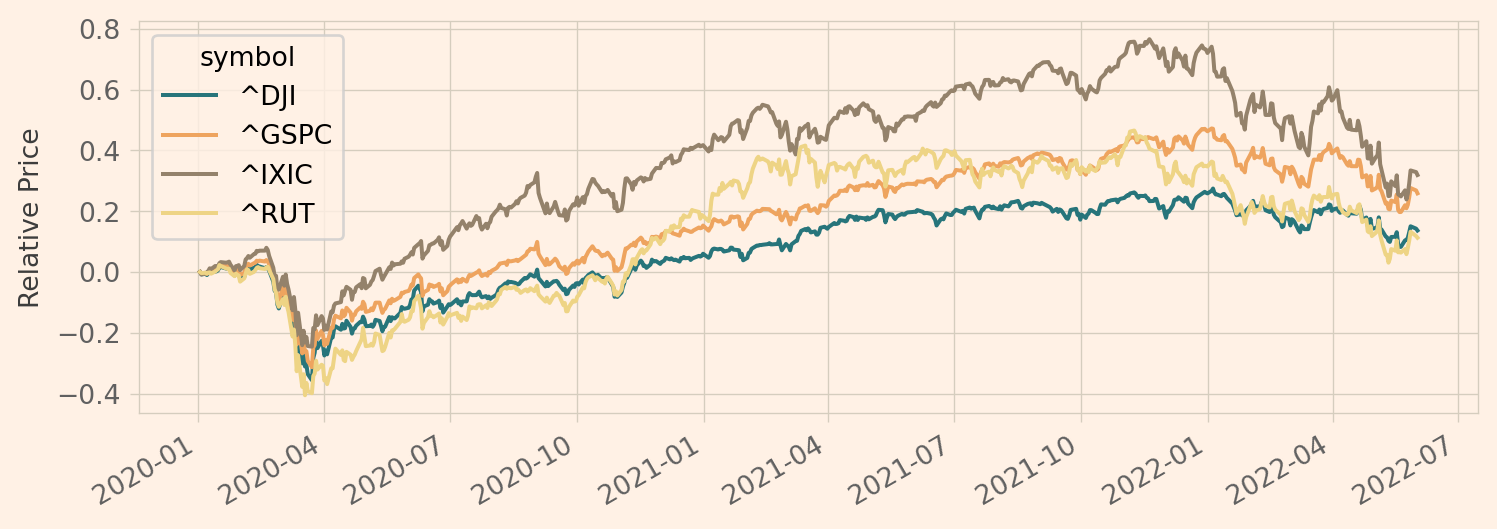

In [6]:
with plt.style.context("capon"):
    plt.figure(figsize=(9, 3), dpi=96)
    markets.pivot_table(
        index="timestamp", columns="symbol", values="relative_price"
    ).plot(ax=plt.gca())
    plt.xlabel(None)
    plt.ylabel("Relative Price")

## Visualization with Altair

In [7]:
import altair as alt

In [8]:
chart = (
    alt.Chart(markets)
    .mark_line(interpolate="monotone")
    .encode(
        x=alt.X("timestamp", title=None, axis=alt.Axis(format="%b %y")),
        y=alt.Y("relative_price", title="Relative Price", axis=alt.Axis(format="+%")),
        color="symbol",
        tooltip=["timestamp", "symbol", alt.Tooltip("relative_price", format="+.2%")],
    )
    .properties(
        title={
            "text": f"Market Indexes Change",
            "subtitle": f"Relative to {markets['timestamp'].dt.date.min()}",
        },
        width=600,
        height=200,
    )
)

display(chart)

alt.Chart(...)

In [9]:
with alt.themes.enable("capon"):
    display(chart)

alt.Chart(...)